In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
# Generar datos y etiquetas
data = []
labels = []

for i in range(1000):
    value = np.random.uniform(0, 1)
    label = round(value)
    data.append(value)
    labels.append(label)


In [30]:
# Convertir las listas de Python a arrays de NumPy
X = np.array(data).reshape(-1, 1)
y = np.array(labels)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Crear el modelo de regresión logística
model = LogisticRegression(solver='lbfgs')

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}".format(accuracy))

Precisión del modelo: 1.00


In [39]:
# Predicción a mano
handmade_prediction = model.predict([[0.49]])
print("Predicción {}".format(handmade_prediction))

Predicción [0]


In [35]:
# Imprimir los valores de los parámetros aprendidos
print("Valor del coeficiente (theta_1): {:.2f}".format(model.coef_[0][0]))
print("Valor del intercepto (theta_0): {:.2f}".format(model.intercept_[0]))

Valor del coeficiente (theta_1): 10.89
Valor del intercepto (theta_0): -5.43


In [36]:
# Obtener límites de decisión
theta_1 = model.coef_[0][0]
theta_0 = model.intercept_[0]
x_decision = np.linspace(0, 1, 100)
y_decision = 1 / (1 + np.exp(-(theta_0 + theta_1 * x_decision)))

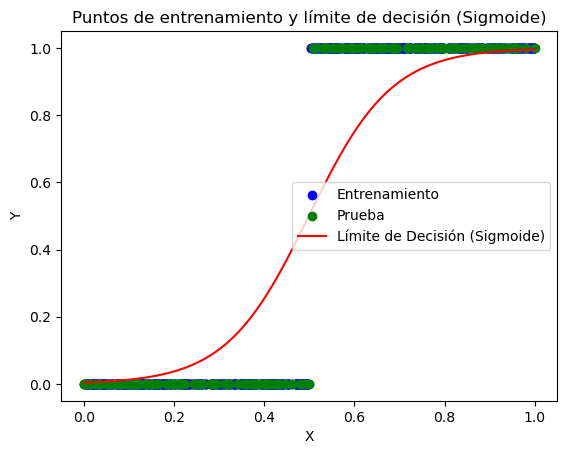

In [37]:
# Graficar los puntos de entrenamiento y el límite de decisión
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Prueba')
plt.plot(x_decision, y_decision, color='red', label='Límite de Decisión (Sigmoide)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Puntos de entrenamiento y límite de decisión (Sigmoide)')
plt.legend()
plt.show()